<a href="https://colab.research.google.com/github/SiPilip/pytorch_course/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyTorch Computer Vision

## 0. Computer Vision pustaka didalam pytorch

* `torch.vision` - basis domain pustaka untuk pyTorch computer vision
* `torchvision.datasets` - ambil datasets dan data fungsi dari computer vision
* `torchvision.models` - ambil model yang sudah dilatih sebelumnya yang dapat menjadi solusi model dari permasalahn kita
* `torchvision.transforms` - fungsi untuk memanipulasi data vision kita untuk dapat digunkan
* `torch.utils.data.Dataset` - basis kelas dataset untuk pyTorch
* `torch.utils.data.DataLoader` - membuat iterasi python dari dataset

In [64]:
# Import pyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

# Import matplotlib untuk visualisasi
import matplotlib.pyplot as plt

# Cek versi
print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu124
0.20.1+cu124


### 1. Ambil dataset

Dataset yang akan kita gunakan adalah FashionMNIST dari torchvision.datasets

In [65]:
# Setup data latih
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root="data", #direktori dataset
    train=True, #apakah dataset yang akan dipakai mau dilatih?
    download=True, #apakah kita akan mendownload dataset
    transform=torchvision.transforms.ToTensor(), #datanya mau ditransfrom kemana?
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [66]:
len(train_data), len(test_data)

(60000, 10000)

In [67]:
# Lihat hasil latihan pertama
image, label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [68]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [69]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [70]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [71]:
# Cek bentuk dari data gambar kita
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


### 1.2 Visualisasi data

Bentuk Gambar: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

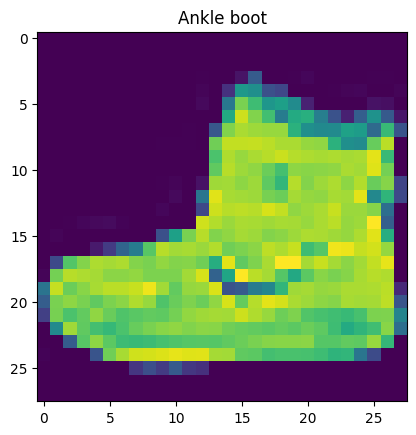

In [72]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Bentuk Gambar: {image.shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label])

(-0.5, 27.5, 27.5, -0.5)

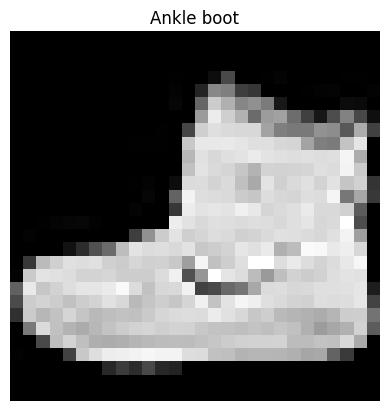

In [73]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

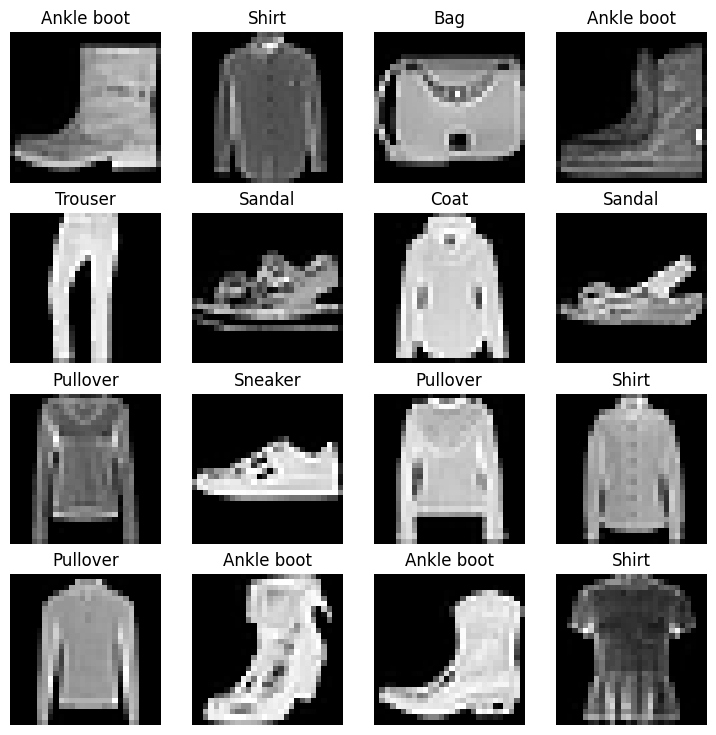

In [74]:
# Plot lebih banyak gambar
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

#Apakah model gambar ini dapat di modeling dengan hana garis lurus atau kita membutuhkan non-linear?

In [75]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Menyiapkan DataLoader

Sekarang, data kita dalam bentuk pyTorch datasets

DataLoader merubah dataset kita menjadi iterasi python

Lebih spesifik, kita ingin untuk mengubah data kita menjadi batches ( atau batches kecil )

Mengapa kita melakukannya?
1. Ini lebih efisien secara kmputusan, karena hardware kita tidak bisa melihat 60 ribu gambar dalam sekali jadi kita memecahnya dalam 32 gambar dalam sekali lihat.
2. Itu memberikan neural network kemungkinan untuk update gradient dalam satu epoch.

In [76]:
from torch.utils.data import DataLoader

# Siapkan ukuran batch hyyperparameter
BATCH_SIZE = 32

#Ubah dataset menjadi iterable (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x780b4c82c090>,
 <torch.utils.data.dataloader.DataLoader at 0x780b4c4e6190>)

In [77]:
# Lihat apa yang kita buat!
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x780b4c82c090>, <torch.utils.data.dataloader.DataLoader object at 0x780b4c4e6190>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [78]:
# Cek apa didalem training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


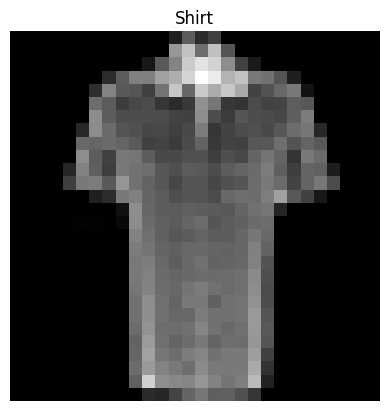

In [79]:
# Sampel batch
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

### 3. Model 0: Bangun baseline model

Ketika membuat seri pembelajaran mesin model, sudah best practive untuk membuat basline models

Base line model adalah model simpel yyang yang akan dicoba dan uji terhadap model lain

In [80]:
# Buat flatten layer
flatten_model = nn.Flatten()

# Ambil satu sample
x = train_features_batch[0]
x.shape

# Flatten sampel
output = flatten_model(x) # Perform forward pass

print(f"{x.shape}")
print(f"{output.shape}")

torch.Size([1, 28, 28])
torch.Size([1, 784])


In [81]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
    )

  def forward(self, x):
    return self.layer_stack(x)

In [82]:
torch.manual_seed(42)

# Setup model dengan input parameter
model_0 = FashionMNISTModelV0(
    input_shape=784, # ini 28*28
    hidden_units=10, # seberapa banyak units di hidden layer
    output_shape=len(class_names) # satu dari tiap class
)
model_0.to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [83]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [84]:
model_0.state_dict() # dinisialisasi dengan nilai acak, lalau bobot dan weightnyya disesuaikan

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Bangun setup loss, optimizer, dan matrik evaluasi

* Loss function - sejak kita bekerja dengan kelas multikelas, loss function kita akan menggunakan `nn.CrossEntropyLoss()`
* Optimizer - akan menggunakan `torch.optim.SGD()` (stokastik gradient descent)
* Matrik evaluasi - sejak kita bekerja menggunakan masalah klasifikasi, mari menggunakan akurasi dengan menggunakan metrik evaluasi

In [85]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [86]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Membuat fungsi untuk mewaktukan eksperimen

Pembelajaran mestin adalah sangat experimental

2 dari hal terpenting yang akan kamu temui
1. Performa model (loss dan akurasi)
2. Seberapa cepat dia dijalankan

In [87]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} secs")
  return total_time

### 3.3 Membuat training loop, dan train model dengaan batches of data

1. Loop epochsnya
2. Loop melalui training batches, perform training steps, kalukasi train loss *per batch*
3. Loop melalui testing batch, perform testing steps, kalkukasi test loss
4. Visualisasi
5. Time it

In [88]:
# Import tqdm untuk progress bar
from tqdm.auto import tqdm

# Atur seed, dan start timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Atur jumlah epochs
epochs = 3

# Buat training dan test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---")
  ### Training
  train_loss = 0

  # Buat loop training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # Akumulasi train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Visualiasi
    if batch % 400 == 0:
      print(f"Pada {batch * len(X)}/{len(train_dataloader.dataset)}")

  # Bagi total train loss dengan panjang dari train dataloader
  train_loss /= len(train_dataloader)

  ## Testing
  test_loss, test_acc = 0, 0 #rest test_loss dan test_acc

  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Kalkulasi loss
      test_loss += loss_fn(test_pred, y_test)

      # 3. Kalkulasi akurasi
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))

    # Kalkulasi test loss average per batch
    test_loss /= len(test_data)

    # Kalkulasi test acc average per batch
    test_acc /= len(test_dataloader)

  #Print
  print(f"\n Train Loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Kalkulasi training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---
Pada 0/60000
Pada 12800/60000
Pada 25600/60000
Pada 38400/60000
Pada 51200/60000

 Train Loss: 0.5904 | Test loss: 0.0159, Test acc: 82.0387
Epoch: 1
---
Pada 0/60000
Pada 12800/60000
Pada 25600/60000
Pada 38400/60000
Pada 51200/60000

 Train Loss: 0.4763 | Test loss: 0.0150, Test acc: 83.1969
Epoch: 2
---
Pada 0/60000
Pada 12800/60000
Pada 25600/60000
Pada 38400/60000
Pada 51200/60000

 Train Loss: 0.4550 | Test loss: 0.0149, Test acc: 83.4265
Train time on cpu: 23.881 secs


### 4. Buat prediksi dari model 0

In [89]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Buat prediksi
      y_pred = model(X)

      # Akumulasi loss dan acc per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Ikut loss and acc untuk menemukan rerata per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

# Kalkulasi model 0 hasil dari prediksi
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

### 5. Setup device agnostic-code

In [90]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 6. Model 1: Bangun model yang lebih baik dengan konsep non linear

In [91]:
# Bangun model dengan non-linear dan linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU(),
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [92]:
# Inisiasi model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)
                              ).to(device)

### 6.1 Setup loss, optimizer, dan matrik evaluasi

In [93]:
loss_fn = nn.CrossEntropyLoss() # mengukur seberapa salah model kita
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1) # mencoba untuk mengupdate model parameter kita untuk mengurangi loss

:

### 6.2 Fungsi training dan evlauasi/testing loops

Buat fungsi training untuk
* Training loop - `train_step()`
* Testing loop - `test_step()`

In [94]:
### Training
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  train_loss, train_acc = 0, 0

  model.train()

  # Buat loop training batches
  for batch, (X, y) in enumerate(data_loader):

    # Letakkan data pada device target
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # Akumulasi train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  # Bagi total train loss dan akurasi dengan panjang dari train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [95]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  test_loss, test_acc = 0, 0

  # Letakkan model pada mode evaluasi
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      # Kirim data ke target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred = model(X)

      # 2. Kalkulasi loss/acc
      test_loss += loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true=y,
                           y_pred=test_pred.argmax(dim=1)) #-> logits ke prediction lables

    # Buat metrik dan visualisasikan
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")


In [96]:
torch.manual_seed(42)

# Ukur waktu
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Atur epochs
epochs = 3

# Buat optimasi dan evaluasi dengan train_step() dan test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()

total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Train loss: 1.09199 | Train acc: 61.34%
Test loss: 0.95636 | Test acc: 65.00%
Epoch: 1
Train loss: 0.78101 | Train acc: 71.93%
Test loss: 0.72227 | Test acc: 73.91%
Epoch: 2
Train loss: 0.67027 | Train acc: 75.94%
Test loss: 0.68500 | Test acc: 75.02%
Train time on cuda: 27.193 secs


In [97]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [98]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Buat data kita agnostik
      X, y = X.to(device), y.to(device)

      # Buat prediksi
      y_pred = model(X)

      # Akumulasi loss dan acc per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Ikut loss and acc untuk menemukan rerata per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

In [99]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## Model 2: Building a convulitional neural network (CNN)

CNN dikenal sebagai ConvNets

CNN dikenal dengan kapabilitas nya untuk menemukan pola dalam visualisasi data

In [125]:
# Buat konvulisonal neural network
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape:int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # nilai yang dapat kita set sendiri dalam neural network adalah hyperparameter
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1,),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
        )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x

In [126]:
image.shape

torch.Size([1, 28, 28])

In [127]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

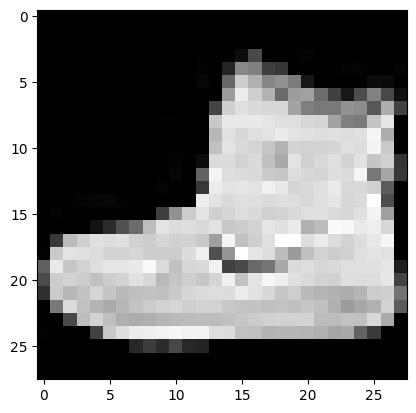

In [128]:
plt.imshow(image.squeeze(), cmap='gray')

In [129]:
rand_image_tensor = torch.rand(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [123]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

torch.Size([1, 10, 14, 14])
torch.Size([1, 10, 7, 7])
torch.Size([1, 10])


tensor([[ 0.0372, -0.0748,  0.0573, -0.0396, -0.0098,  0.0194, -0.0003, -0.0114,
          0.0206,  0.0003]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1 Selanjutnya adalah belajar tentang conv2d

In [130]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [131]:
# Buat satu conv2d layer\
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3, 3),
                       stride=1,
                       padding=0)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 62, 62])

### 7.2 Menegetahui tentang `nn.MaxPool2d()`

In [ ]:
# Keluaran bentuk asli tanpa unsqueezed dimension
print(f"Bentuk asli gambar: {test_image.shape}")
print(f"Bentuk asli gambar dengan unsqueezed dimensi: {test_image.unsqueeze(0).shape}")

# Buat samle nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Kasih data ke conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Bentuk setelah melalui conv layer(): {test_image_through_conv.shape}")

# Kasih data ke max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Bentuk setleah melalui conv_layer dan max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

In [ ]:
torch.manual_seed(42)

# Buat random tensor dengan angka mirip dari dimensi gambar kita
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\nRandom tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Buat layer max pool
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Kasih random tensor dari maxx pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

### 7.3 Setup a loss function and optimizer for `model_2`

In [132]:
# Setup loss function/eval metrics/optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 Latih dan tes `model_2` menggunakan fungsi latih dan test

In [134]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Hitung waktu
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device=device)

  train_time_end_model_2 = timer()
  total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                              end=train_time_end_model_2,
                                              device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 0.36399 | Train acc: 86.88%
Test loss: 0.34487 | Test acc: 87.44%
Train time on cuda: 11.165 secs
Epoch: 1
-----
Train loss: 0.32658 | Train acc: 88.21%
Test loss: 0.33492 | Test acc: 87.68%
Train time on cuda: 22.278 secs
Epoch: 2
-----
Train loss: 0.30449 | Train acc: 89.01%
Test loss: 0.30434 | Test acc: 89.23%
Train time on cuda: 33.412 secs


In [ ]:
# Hasil model_2
